In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [3]:
model = torch.load('data_storage/CNN_L16.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-1.2495, -0.3905, -0.5101],
                        [-0.6280, -0.6487, -0.1049],
                        [-1.2306, -0.7497, -0.6100]]],
              
              
                      [[[ 1.3761, -0.6013,  1.4072],
                        [-0.4110, -1.6699, -1.0132],
                        [ 1.5273, -0.9749,  0.3922]]],
              
              
                      [[[-0.2058, -0.4245, -0.6550],
                        [-0.5849,  0.0550, -1.2325],
                        [-0.7437, -1.2865, -0.8524]]],
              
              
                      [[[ 0.0274,  1.5444, -0.5203],
                        [-1.1095,  1.6781, -0.8695],
                        [-0.9338,  1.4510, -1.2502]]],
              
              
                      [[[-0.2475, -1.0346, -1.1592],
                        [-1.2870, -1.0431, -1.1226],
                        [-0.1341, -0.0316, -0.5913]]]])),
             ('fc.0.weight',
            

In [5]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-1.2495, -0.3905, -0.5101],
          [-0.6280, -0.6487, -0.1049],
          [-1.2306, -0.7497, -0.6100]]],


        [[[ 1.3761, -0.6013,  1.4072],
          [-0.4110, -1.6699, -1.0132],
          [ 1.5273, -0.9749,  0.3922]]],


        [[[-0.2058, -0.4245, -0.6550],
          [-0.5849,  0.0550, -1.2325],
          [-0.7437, -1.2865, -0.8524]]],


        [[[ 0.0274,  1.5444, -0.5203],
          [-1.1095,  1.6781, -0.8695],
          [-0.9338,  1.4510, -1.2502]]],


        [[[-0.2475, -1.0346, -1.1592],
          [-1.2870, -1.0431, -1.1226],
          [-0.1341, -0.0316, -0.5913]]]])

In [7]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

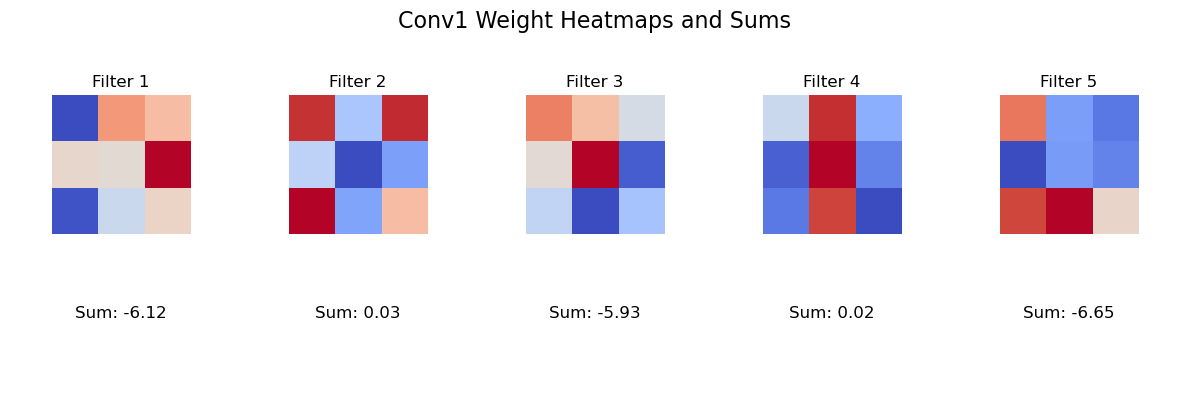

In [18]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [20]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-0.0220, -0.0185, -0.0205,  ..., -0.0150, -0.0182, -0.0184],
        [ 0.0669, -0.0936, -0.1458,  ...,  0.1643, -0.0963,  0.2178],
        [-0.2063, -0.0145,  0.1138,  ...,  0.0100,  0.1296, -0.0944],
        ...,
        [ 0.1010,  0.2097,  0.0196,  ..., -0.1728, -0.1332, -0.3355],
        [ 0.0654,  0.0876, -0.0928,  ...,  0.0036, -0.3298, -0.0688],
        [ 0.2793, -0.0464,  0.0211,  ...,  0.1196,  0.1507, -0.0788]])

In [22]:
fc_weight.size()

torch.Size([25, 80])

In [27]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

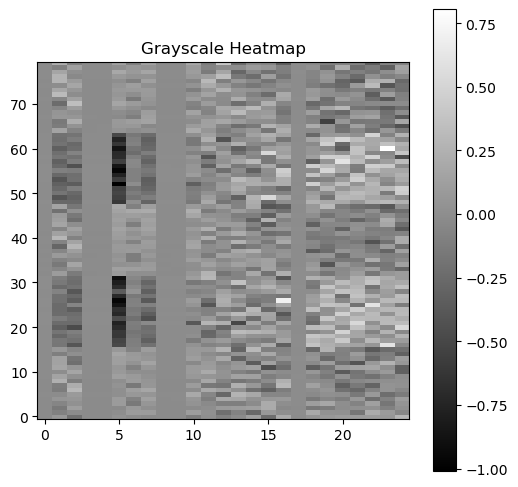

In [36]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')
plt.show()